In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

Name: Aparna Iyer
PRN: 22070126017
Batch: AI-ML A1 (2022-2026)

In [ ]:

#data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df_boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([df_boston.values[::2, :], df_boston.values[1::2, :2]])
target = df_boston.values[1::2, 2]

In [ ]:
#target variable

#preview
df_boston.columns=['CRIM','ZN','INDUS','CHAS','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','Price']

df_boston.head()

,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

In [ ]:
'''features = df_boston.columns[0:10]
target = df_boston.columns[-1]

#X and y values
X = df_boston[features].values
y = df_boston[target].values'''



The dimension of X_train is (708, 10)
The dimension of X_test is (304, 10)


In [ ]:
df_boston.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS       506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
LSTAT      506
Price      506
dtype: int64

In [ ]:
df_boston

,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
#Impute NaN values
#missing values in AGE and CHAS needs to be imputed
mean = df_boston['AGE'].mean() #imputing AGE with mean
df_boston['AGE'].fillna(mean, inplace =True)

mode = df_boston['CHAS'].mode() #imputing CHAS with mode
df_boston['CHAS'].fillna(mode[0], inplace =True)

mean1=df_boston['DIS'].mean()
df_boston['DIS'].fillna(mean1, inplace =True)

mode1 = df_boston['LSTAT'].mode() #imputing LSTAT with mode
df_boston['LSTAT'].fillna(mode1[0], inplace =True)

mean2=df_boston['Price'].mean()
df_boston['Price'].fillna(mean2, inplace =True)

mode2 = df_boston['PTRATIO'].mode() #imputing PTRATIO with mode
df_boston['PTRATIO'].fillna(mode2[0], inplace =True)

mean3=df_boston['TAX'].mean()
df_boston['TAX'].fillna(mean3, inplace =True)

mean4=df_boston['RAD'].mean()
df_boston['RAD'].fillna(mean4, inplace=True)

df_boston

,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.00,2.31,0.0,0.538000,6.575000,65.200000,4.090000,1.0,296.0,15.300000
1,396.90000,4.98,24.00,0.0,0.554695,6.284634,68.574901,3.795043,24.0,666.0,18.455534
2,0.02731,0.00,7.07,0.0,0.469000,6.421000,78.900000,4.967100,2.0,242.0,17.800000
3,396.90000,9.14,21.60,0.0,0.554695,6.284634,68.574901,3.795043,24.0,666.0,18.455534
4,0.02729,0.00,7.07,0.0,0.469000,7.185000,61.100000,4.967100,2.0,242.0,17.800000
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,0.0,0.554695,6.284634,68.574901,3.795043,24.0,666.0,18.455534
1008,0.10959,0.00,11.93,0.0,0.573000,6.794000,89.300000,2.388900,1.0,273.0,21.000000
1009,393.45000,6.48,22.00,0.0,0.554695,6.284634,68.574901,3.795043,24.0,666.0,18.455534
1010,0.04741,0.00,11.93,0.0,0.573000,6.030000,80.800000,2.505000,1.0,273.0,21.000000


In [ ]:
df_boston.isnull().sum() #No NaN values anymore

CRIM       0
ZN         0
INDUS      0
CHAS       0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
Price      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
y=df_boston["Price"]
X=df_boston.drop(columns=["Price"])
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X
y

The dimension of X_train is (708, 10)
The dimension of X_test is (304, 10)


0       15.300000
1       18.455534
2       17.800000
3       18.455534
4       17.800000
          ...    
1007    18.455534
1008    21.000000
1009    18.455534
1010    21.000000
1011    18.455534
Name: Price, Length: 1012, dtype: float64

In [ ]:

#Model
lr = LinearRegression()

#Impute Missing Values


lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("\nLinear Regression Model \n")
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


Linear Regression Model 

The train score for lr model is 0.39079227513205583
The test score for lr model is 0.37428826928832315


Exploratory Data Analysis

<Axes: >

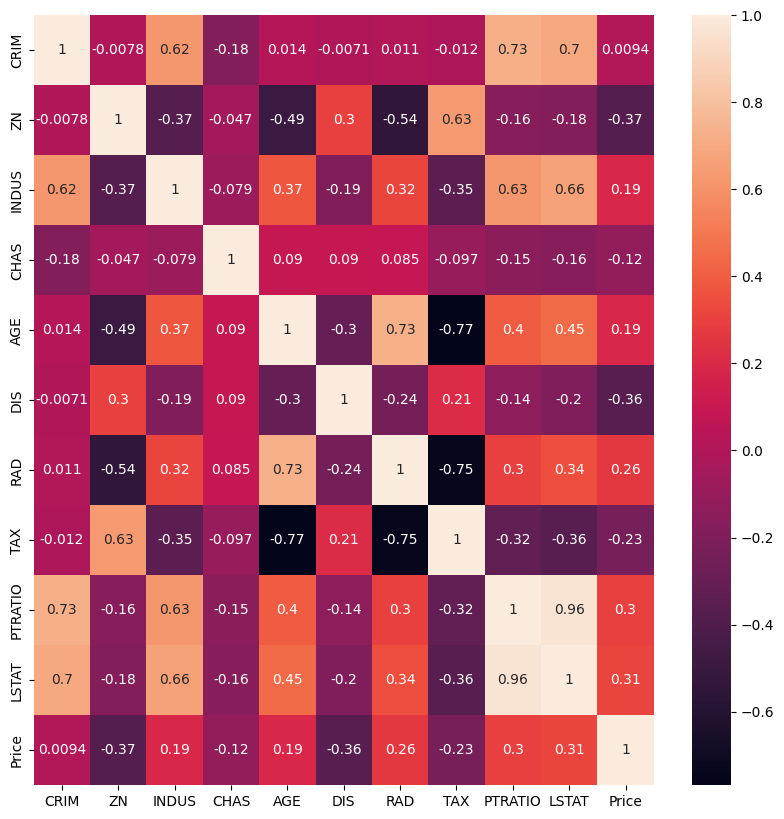

In [ ]:
#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(df_boston.corr(), annot = True)

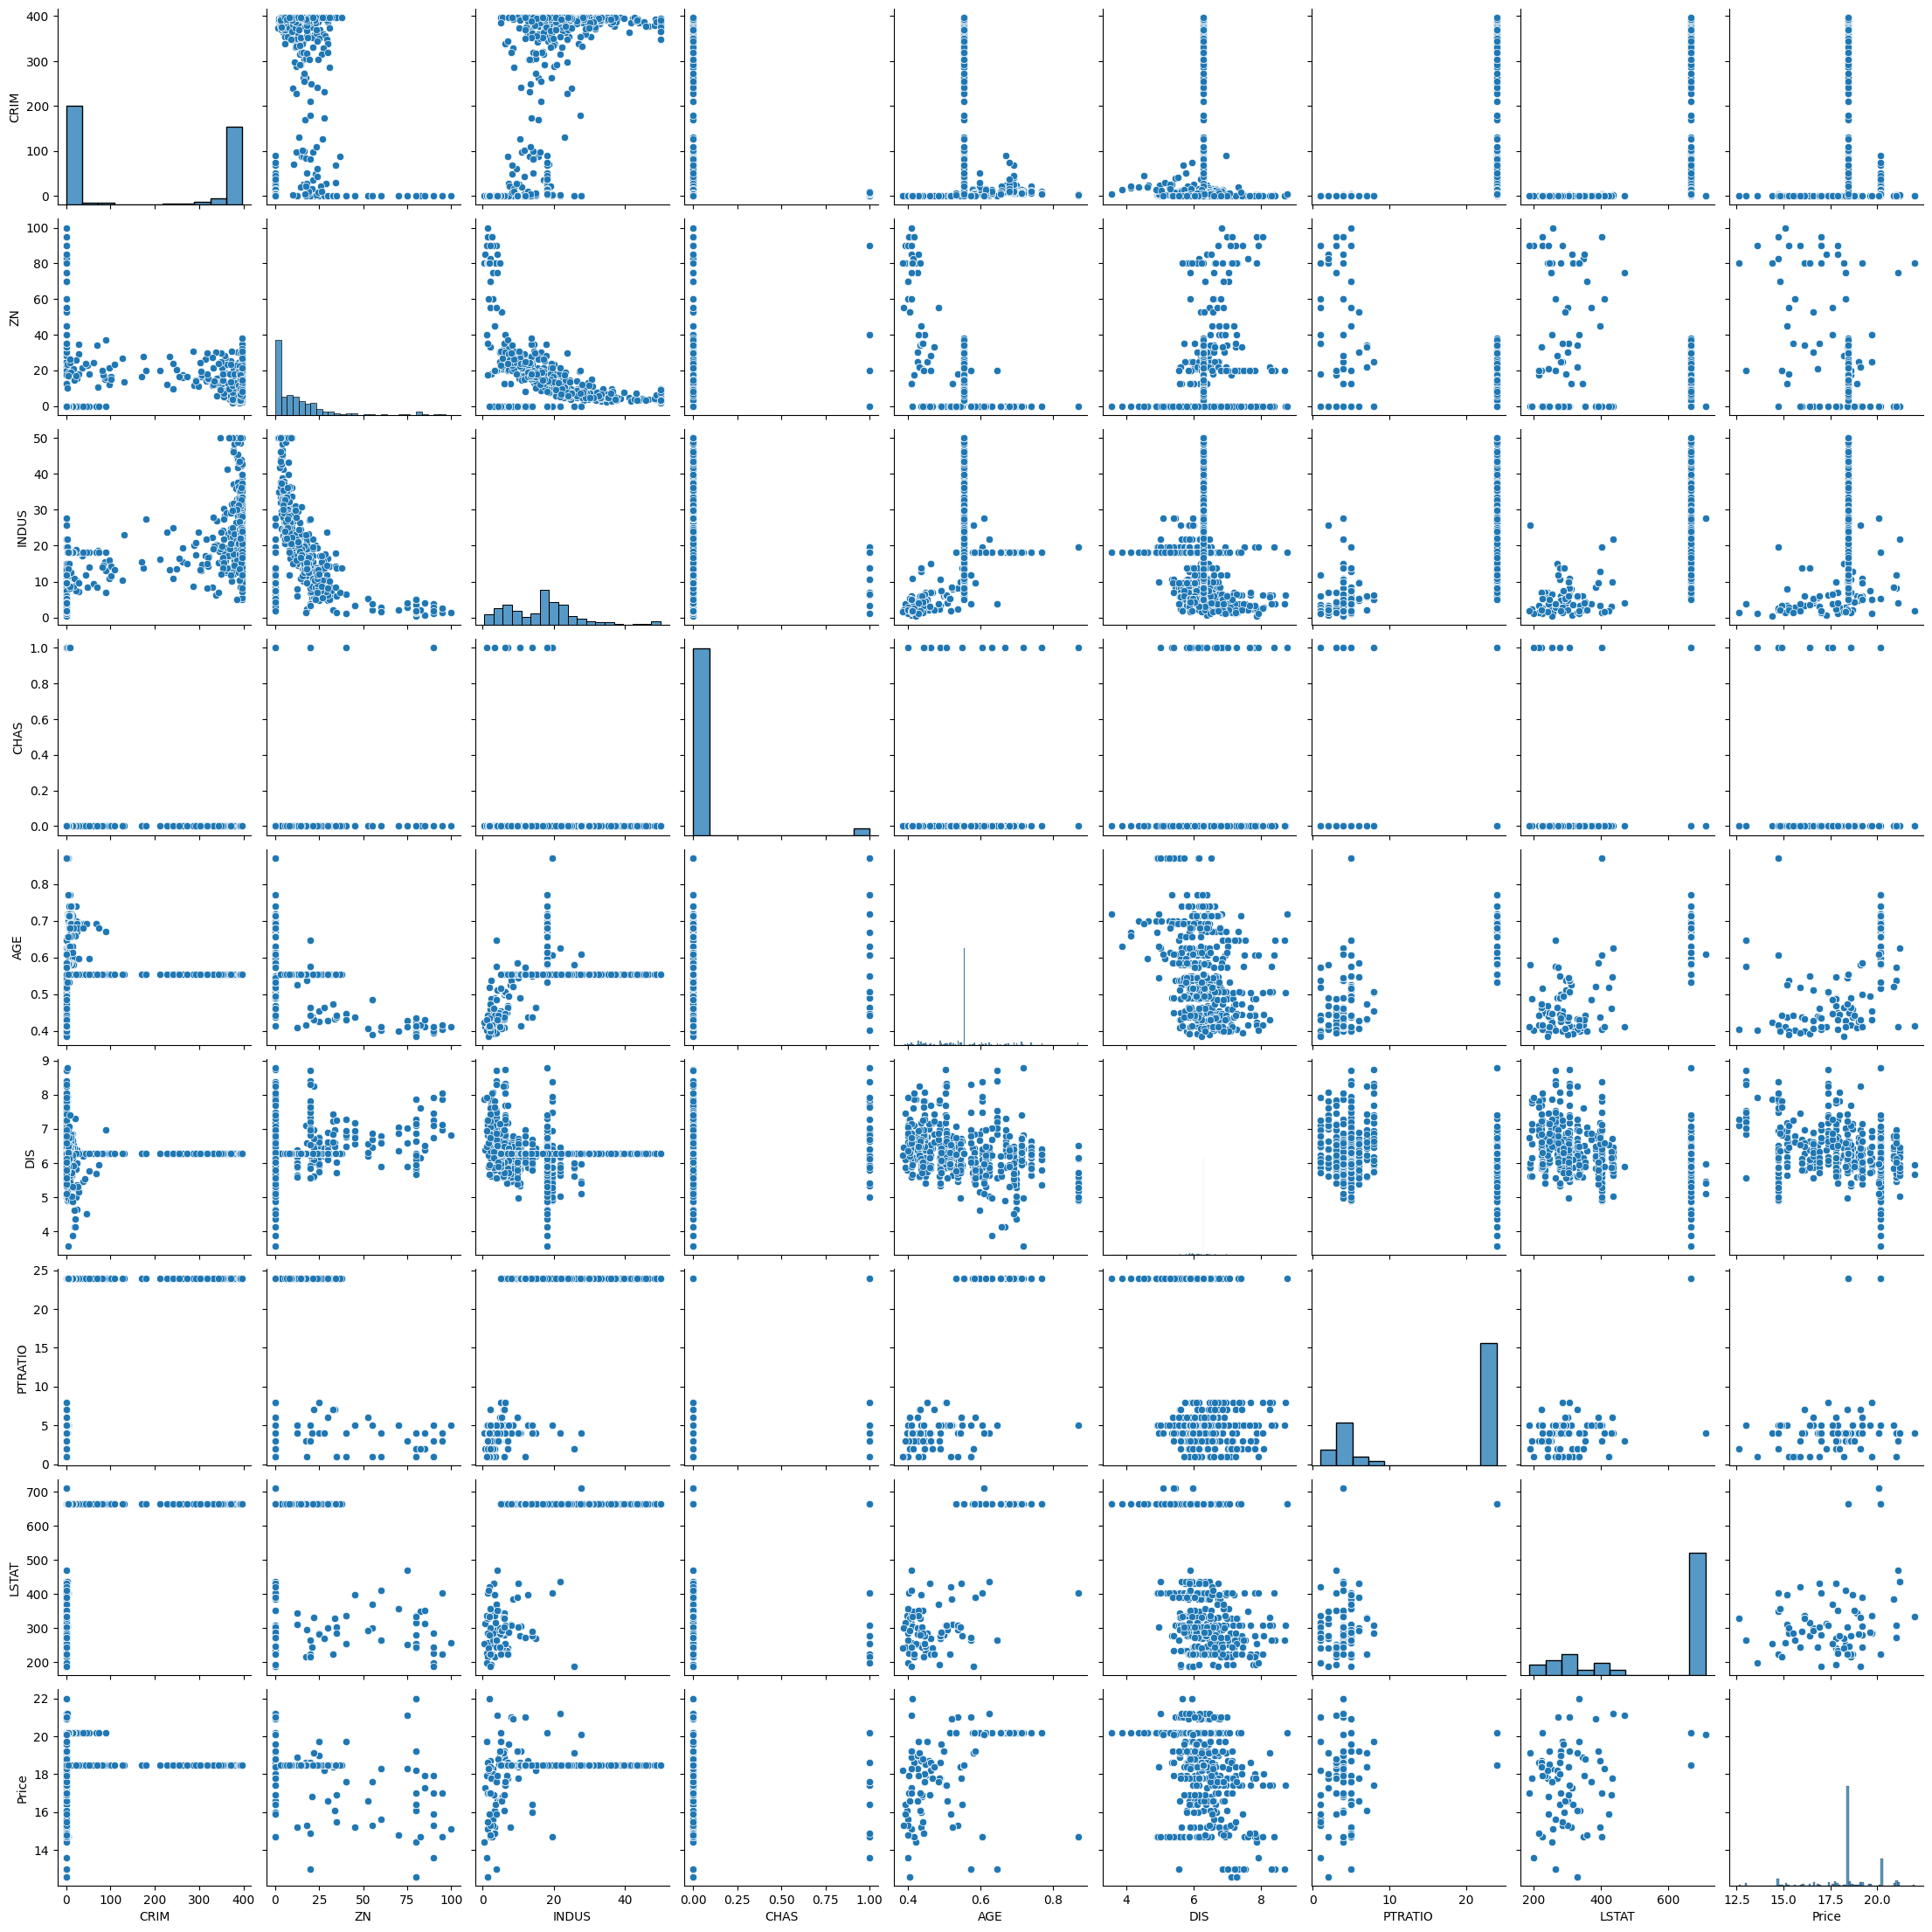

In [ ]:
#There are cases of multicolinearity, we will drop a few columns
df_boston.drop(columns = ["TAX", "RAD"], inplace = True)

#pairplot
sns.pairplot(df_boston)

#we will log the LSTAT Column
df_boston.LSTAT = np.log(df_boston.LSTAT)


ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

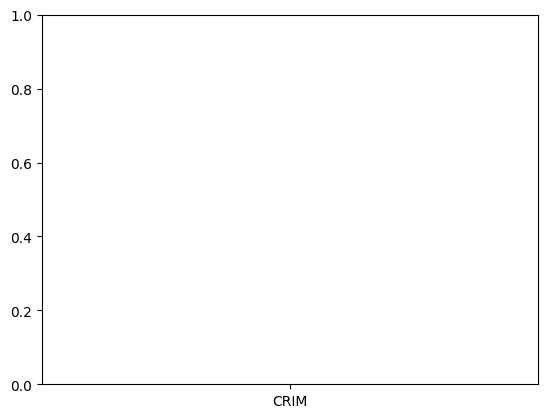

In [ ]:
features = df_boston.columns[0:10]
target = df_boston.columns[-1]
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()